In [1]:
%matplotlib inline
import openpifpaf

openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 200

# Prediction API

This page documents how you can use OpenPifPaf from your own Python code.
It focuses on single-image prediction.
This API interface is for more advanced use cases. Please refer to 
{doc}`Getting Started: Prediction <predict_cli>` for documentation on 
the command line interface.

In [2]:
import io
import numpy as np
import PIL
import requests
import torch

print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.13.0+16.g68c82f2.dirty
PyTorch version 1.10.0


## Load an Example Image

Image credit: "[Learning to surf](https://www.flickr.com/photos/fotologic/6038911779/in/photostream/)" by fotologic which is licensed under [CC-BY-2.0].

[CC-BY-2.0]: https://creativecommons.org/licenses/by/2.0/

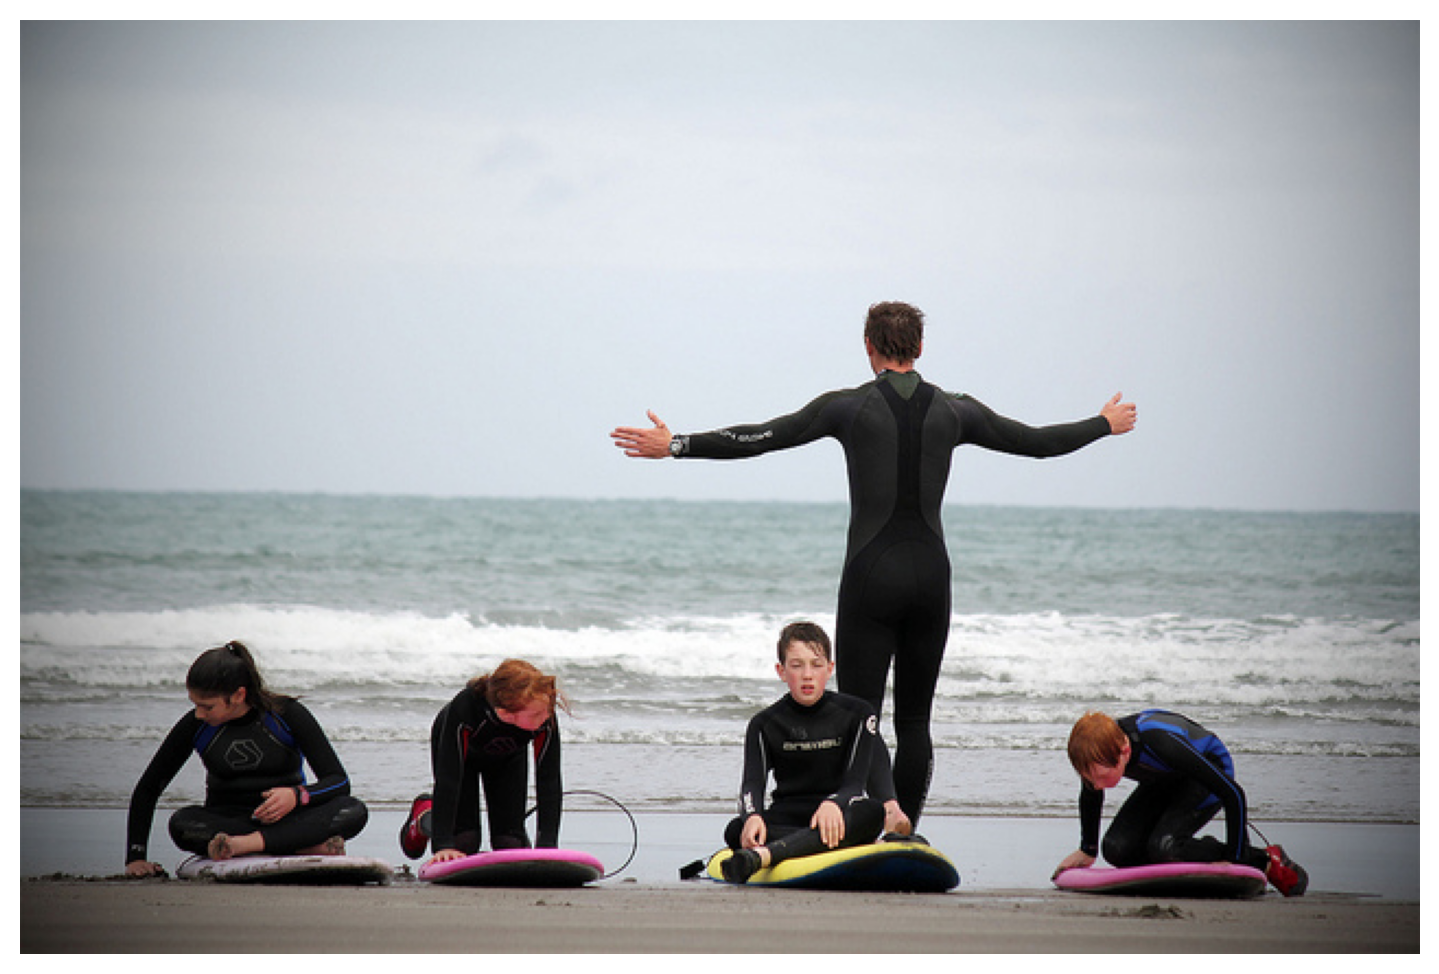

In [3]:
image_response = requests.get('https://raw.githubusercontent.com/openpifpaf/openpifpaf/main/docs/coco/000000081988.jpg')
pil_im = PIL.Image.open(io.BytesIO(image_response.content)).convert('RGB')
im = np.asarray(pil_im)

with openpifpaf.show.image_canvas(im) as ax:
    pass

## Use the Predictor API

In [4]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

SURGERY: Ooops! Path is not yet set :(
SURGERY: Ooops! Path is not yet set :(


We can immediately visualize the predicted annotations (`predictions`):

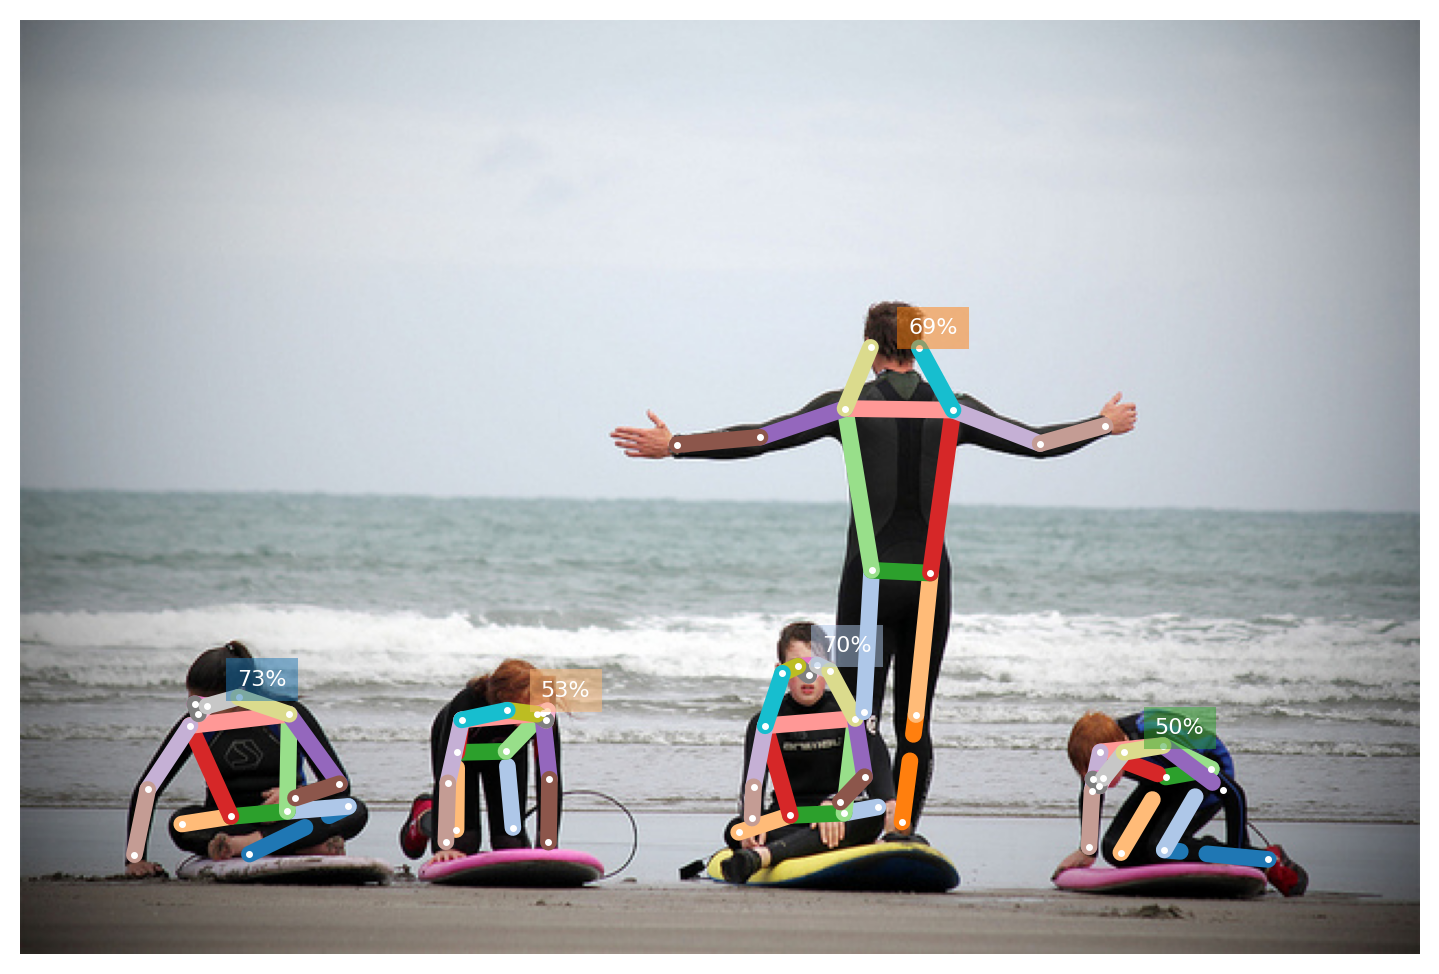

In [5]:
annotation_painter = openpifpaf.show.AnnotationPainter()
with openpifpaf.show.image_canvas(im) as ax:
    annotation_painter.annotations(ax, predictions)

Each prediction in the `predictions` list above is of type `Annotation`. You can access the joint coordinates in the `data` attribute. It is a numpy array that contains the $x$ and $y$ coordinates and the confidence for every joint:

In [6]:
predictions[0]

In [17]:
predictions[0].data

IndexError: list index out of range

The `Predictor` class can also be created with `json_data=True` and then it will
return JSON serializable dicts and list instead of `Annotation` objects.

The other items that are returned are ground truth annotations (`gt_anns`) which
are not provided for this image and meta information about the image (`image_meta`)
which is useful to understand the transformations that were applied before
passing the image through the neural network. Usually, you don't need `image_meta`
as the inverse transform has already been applied to ground truth and predictions
in the `Predictor` class:

In [8]:
gt_anns

[]

In [9]:
image_meta

{'dataset_index': 0,
 'offset': array([ 0., -3.]),
 'scale': array([1., 1.]),
 'rotation': {'angle': 0.0, 'width': None, 'height': None},
 'valid_area': array([  0.,   3., 639., 426.]),
 'hflip': False,
 'width_height': array([640, 427])}

(predict-fields)=
## Fields

Below are visualizations of the fields.
When using the API here, the visualization types are individually enabled.
Then, the index for every field to visualize must be specified. In the example below, the fifth CIF (left shoulder) and the fifth CAF (left shoulder to left hip) are activated.

These plots are also accessible from the command line: use `--debug-indices cif:5 caf:5` to select which joints and connections to visualize.

SURGERY: Ooops! Path is not yet set :(
SURGERY: Ooops! Path is not yet set :(


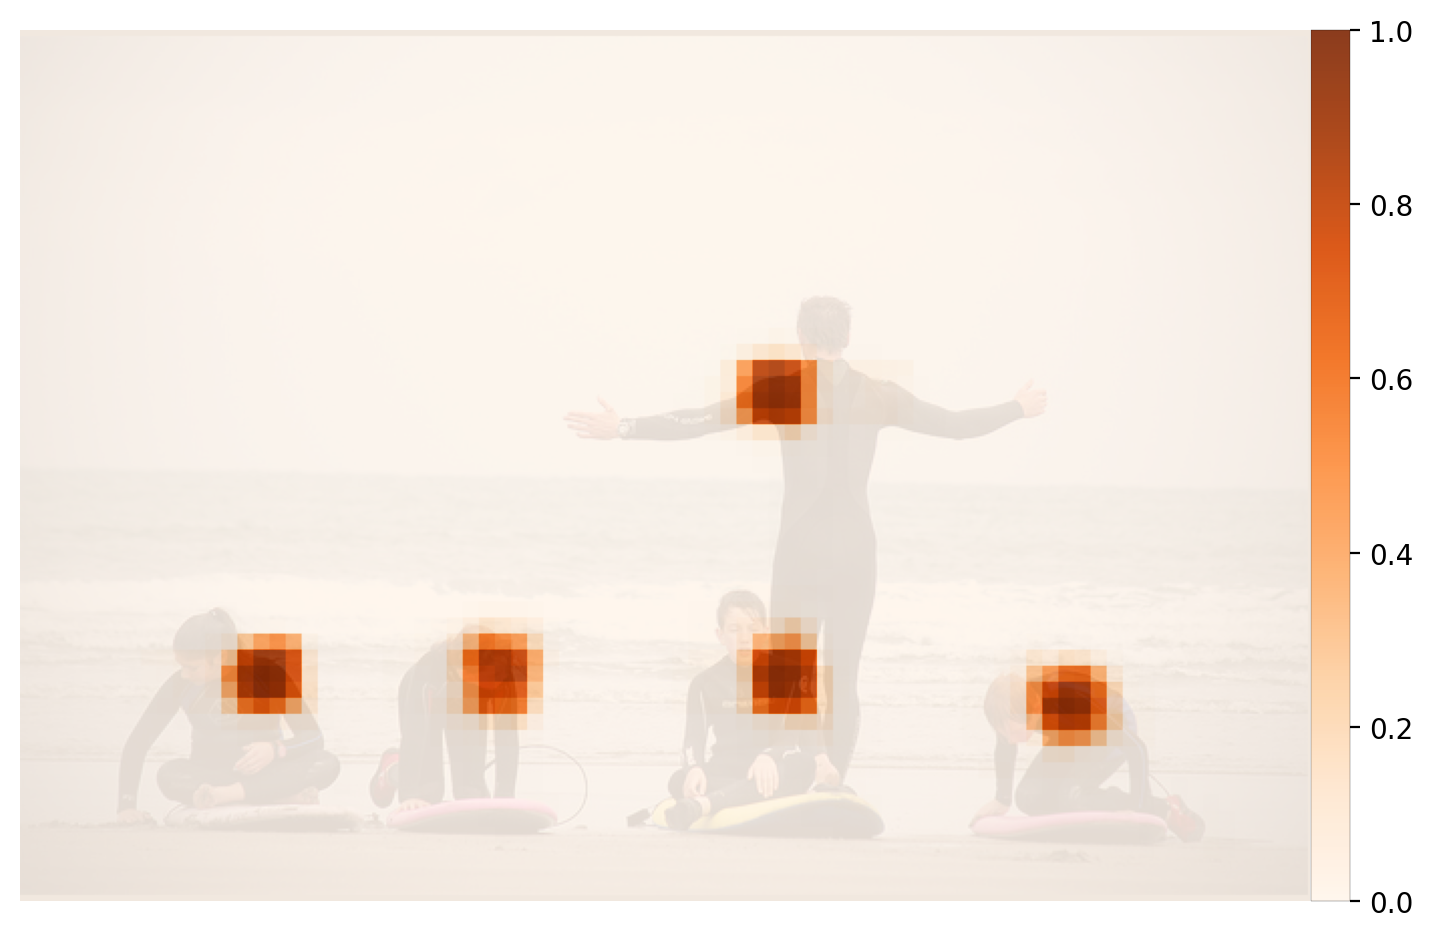

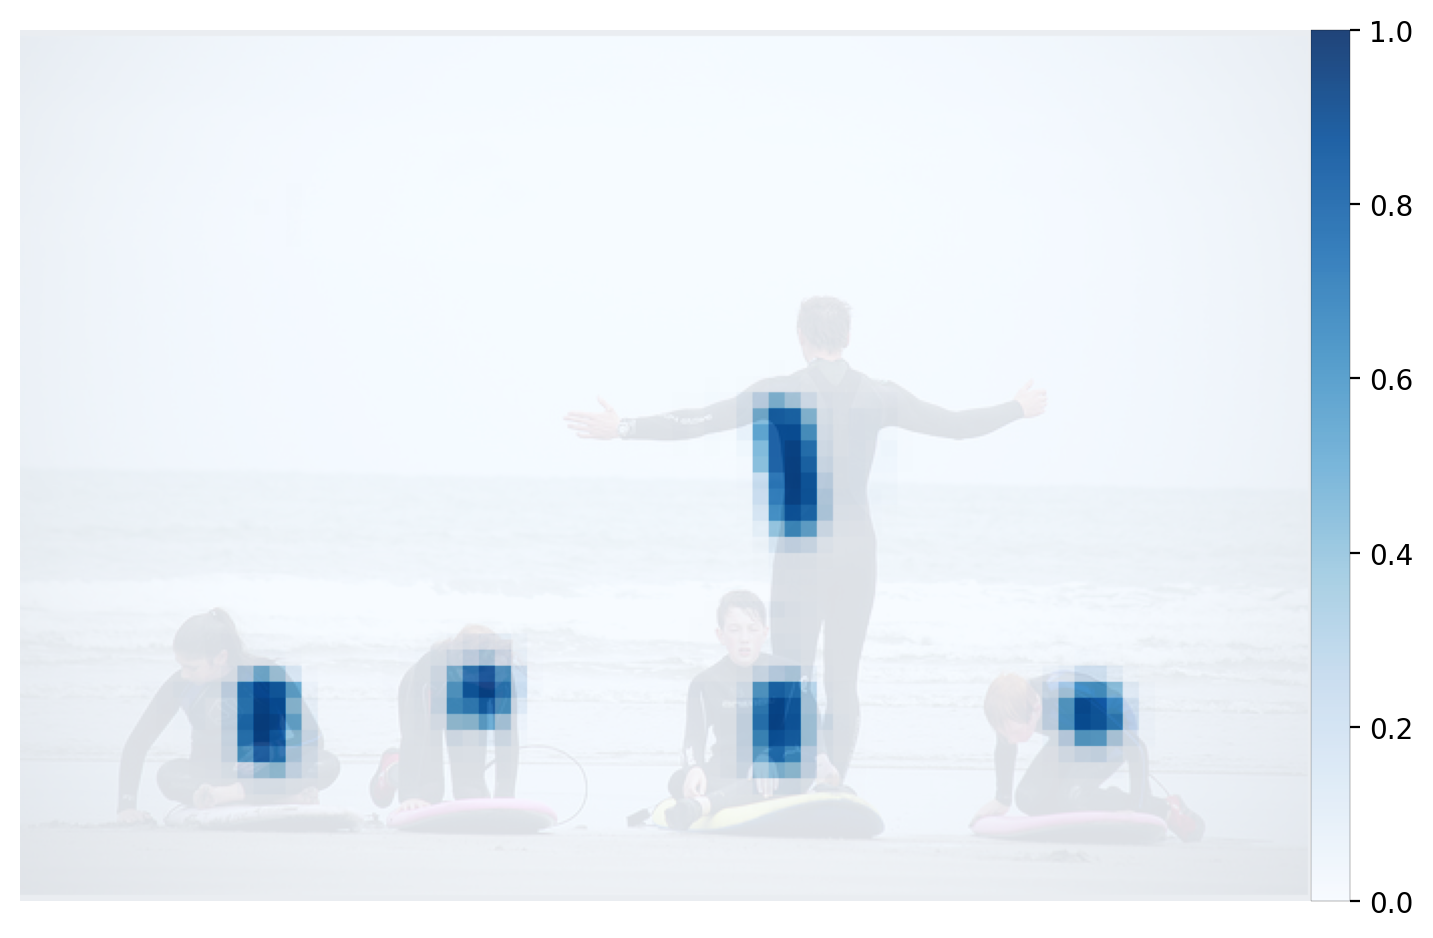

In [10]:
openpifpaf.visualizer.Base.set_all_indices(['cif,caf:5:confidence'])
_ = predictor.pil_image(pil_im)

SURGERY: Ooops! Path is not yet set :(
SURGERY: Ooops! Path is not yet set :(


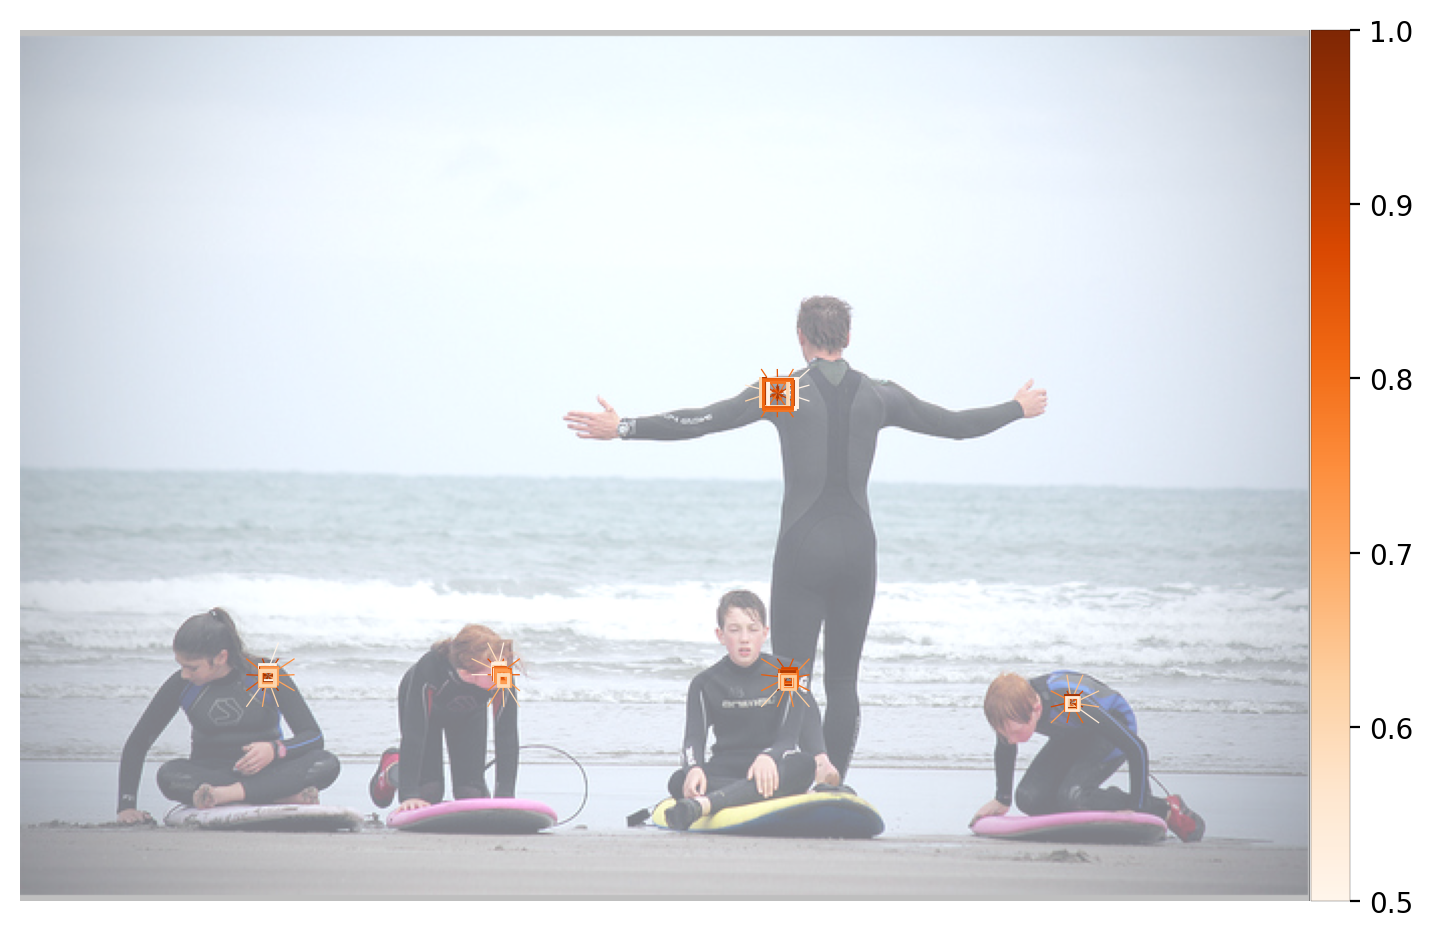

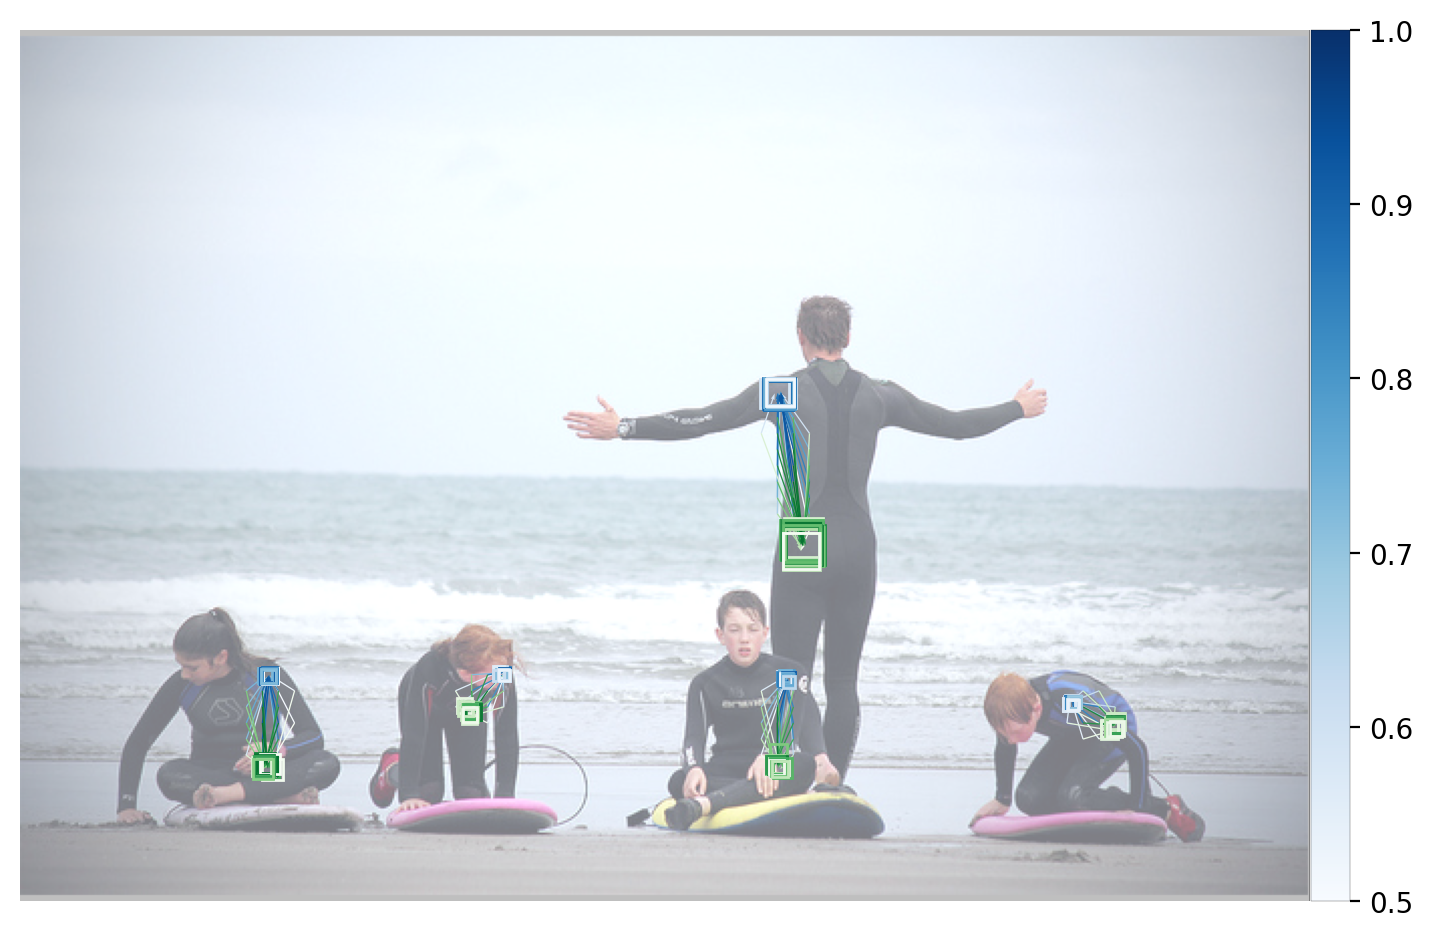

In [11]:
openpifpaf.visualizer.Base.set_all_indices(['cif,caf:5:regression'])
_ = predictor.pil_image(pil_im)

From the CIF field, a high resolution accumulation (in the code it's called `CifHr`) is generated.
This is also the basis for the seeds. Both are shown below.

SURGERY: Ooops! Path is not yet set :(
SURGERY: Ooops! Path is not yet set :(


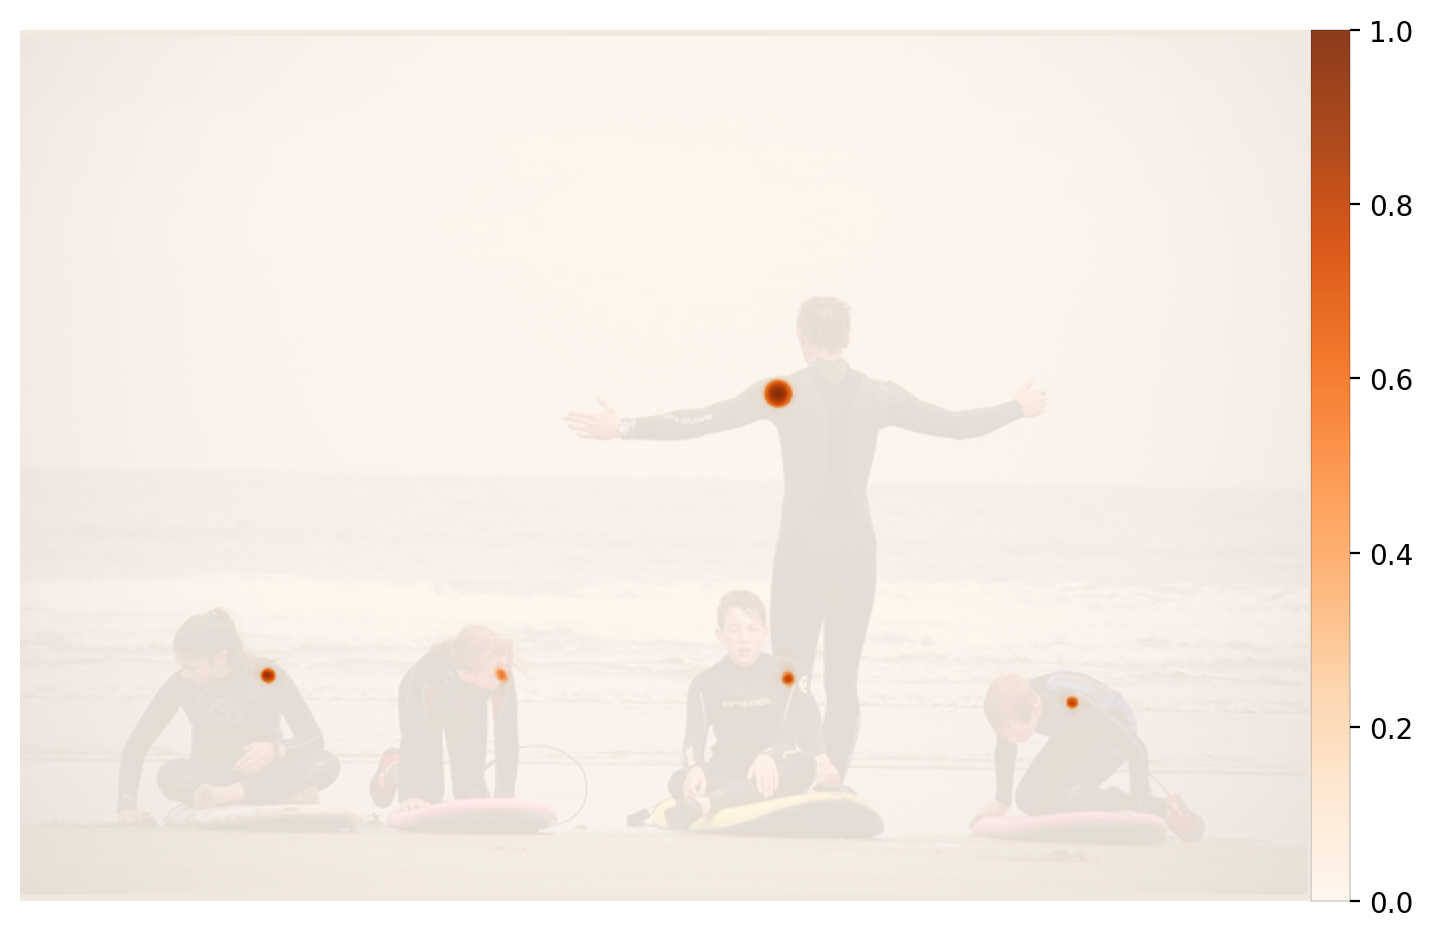

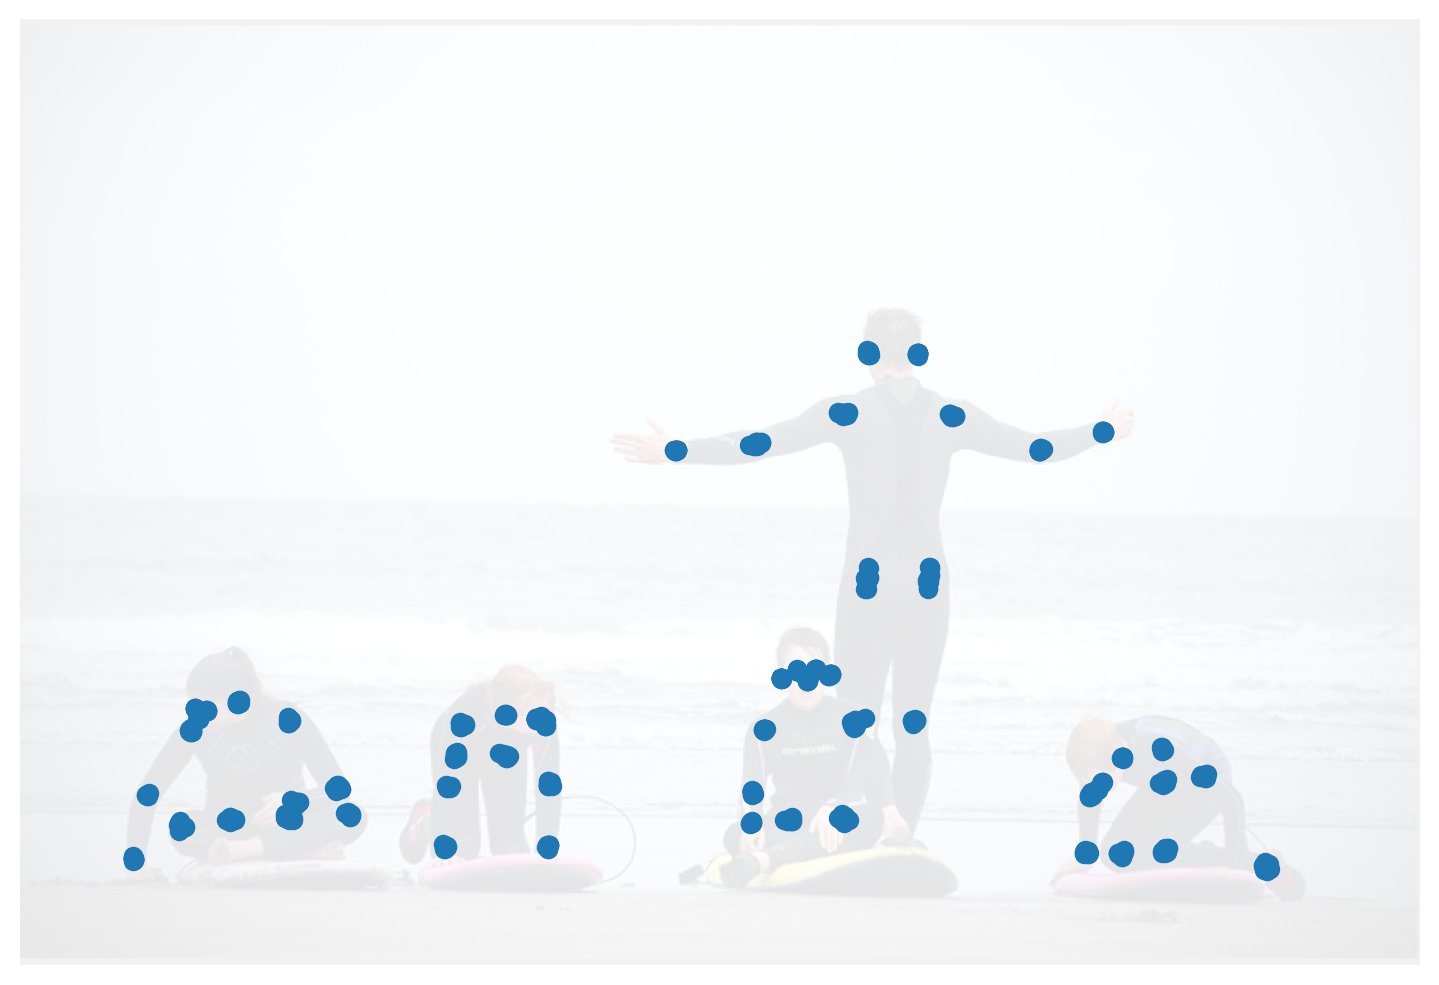

In [12]:
openpifpaf.visualizer.Base.set_all_indices(['cif:5:hr', 'seeds'])
_ = predictor.pil_image(pil_im)

Starting from a seed, the poses are constructed. At every joint position, an occupancy map marks whether a previous pose was already constructed here. This reduces the number of poses that are constructed from multiple seeds for the same person. The final occupancy map is below:

SURGERY: Ooops! Path is not yet set :(
SURGERY: Ooops! Path is not yet set :(


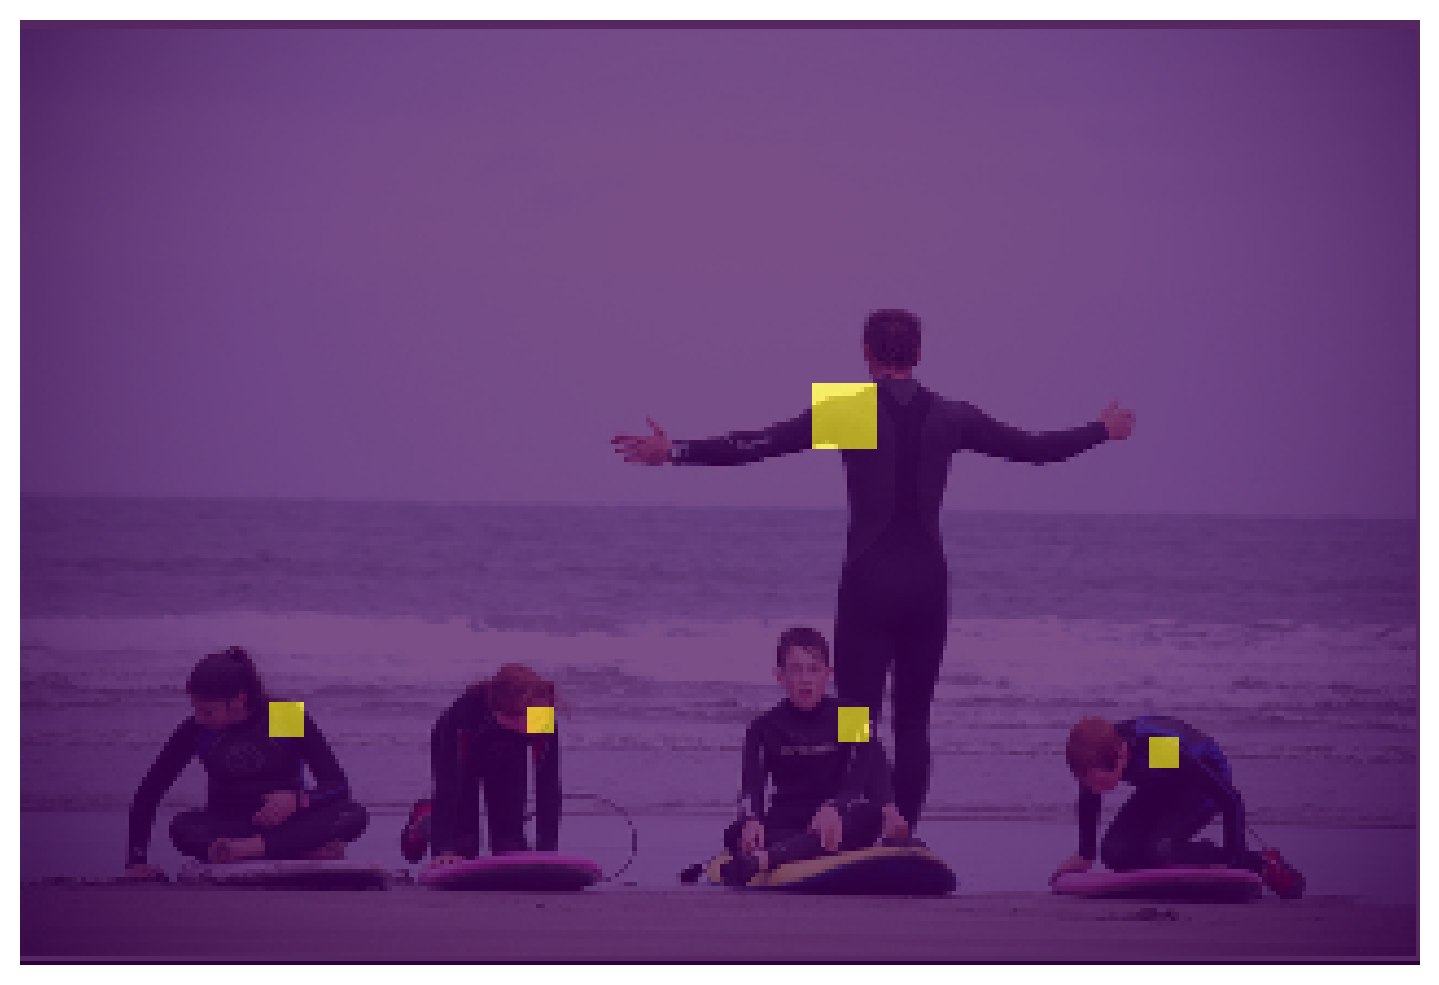

In [13]:
openpifpaf.visualizer.Base.set_all_indices(['occupancy:5'])
_ = predictor.pil_image(pil_im)